In [11]:
import utils
import json
from mapboxfetcher import MapBoxFetcher
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import PIL
from shapely.geometry import shape

In [12]:
geojson = json.load(open('Switzerland.geojson'))

In [3]:
polygon = utils.polygon_union(geojson['features'])
bounds = polygon.bounds

In [27]:
import pyproj
from shapely.geometry import shape
from shapely.ops import transform
from functools import partial
polygon = shape(geojson['features'][0]['geometry'])
proj = partial(pyproj.transform,
               pyproj.Proj(init='epsg:4326'),
#                pyproj.Proj(init='epsg:27700')
                pyproj.Proj(
                    proj='aea',
                    lat1=polygon.bounds[1],
                    lat2=polygon.bounds[3])
              )

polygon_new = transform(proj, polygon)
print(polygon_new.area / 10**6)

41280.9199731983


In [3]:


zoom = 16
lat, lon = bounds[3], bounds[0]
start_numx, start_numy = utils.deg2num(lat, lon, zoom)
numx, numy = start_numx, start_numy

tile_count = 0
tile_x_count = 0
tile_y_count = 0
fetcher = MapBoxFetcher()
sat_data = []

while lat >= bounds[1]:
    while lon <= bounds[2]:
#         sat_img = fetcher.satellite(numx, numy, zoom, hq=True)
#         sat_data.append(sat_img)
        
        tile_count += 1

        numx += 1
        lon = utils.num2deg(numx, numy, zoom)[1]
    lon = bounds[0]
    numx = start_numx
    numy += 1
    tile_y_count += 1
    lat = utils.num2deg(numx, numy, zoom)[0]
tile_x_count = tile_count // tile_y_count
    
print('Polygon contains {} tiles at zoom level {} with tile resolution {}x{}'.format(
    tile_count,
    zoom,
    tile_y_count,
    tile_x_count
))

Polygon contains 46221 tiles at zoom level 16 with tile resolution 213x217


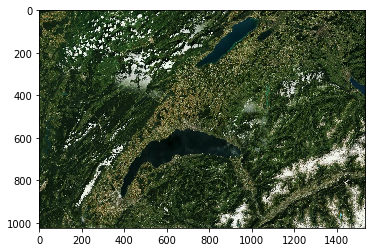

In [129]:
tile_size = 512
canvas = PIL.Image.new('RGB', (tile_x_count * tile_size, tile_y_count * tile_size))
for y in range(tile_y_count):
    for x in range(tile_x_count):
        canvas.paste(sat_data[y*tile_x_count + x].image(), (x*tile_size, y*tile_size))
plt.imshow(np.asarray(canvas))